In [ ]:
!pip install biopython
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.8 MB/s eta 0:00:00


In [ ]:
import Bio

In [ ]:
from Bio import SeqIO
for record in SeqIO.parse("bche.fasta", "fasta"):
  print(record.id)
  print(record.description)
  print(record.seq)

AH003534.2
AH003534.2 Homo sapiens butyrylcholinesterase (BCHE) gene, complete cds
CAGCTGCTGCTGTAAGTTGAGCCACAAGGAAGAAACTCTAAGACAGGAAGAATAAATGCTTTAGAGGTGCACTAAAATAATGAATGAACTAATGTGGCATAGCTGTGAAATCATGCGAGGAAAAGAACTACAGGGACAGTAACAGAAGGTGGTTCTTTGAAGTAAAGACATTGAGAAGAAGAAAAATTGCCAACTTGTGTAATCAGTTGATGTTGCTAGTTAGCCAGTTTAAACATGCGTTAAAGATAAAGATCTGCTTGAAACCAATTATTTTATTGTTTGGCTTCCTGTTTAAAGATGAAAATGAAATATGTGTATATATGTGACATATTTTACCTAGCAGTGAGTAGATGCAGGAAGCATGTAAAATGCTCTGCTGAATTCACTAACGTCACAAAATATTCCTTAATAATTGCCGCGTTTGATAGGCTGACCGTATGCTAGCACAGGAAACAATGCAGTGGACTTGGGTTGGAGAGAAGAATTTTGACATTTGGATTTTTAAAAATCATGTATATTGAACCCATGAACTCTCATGTGGAACATCAGATTTACTATATTTTAAACAGAAATGCCCATCACTATAAAAACCATTGCAAATTTGTCAATATACTTCCCATTTAAAAAGCCTTTTCCTGCTTTTATTGATTTATTGATTAATTTTTTTTTGAGACAGGATCTCACTCTGTCACCCACGATGAAGTCCAGTGGCACAATCGTGGCTTGCAGCCTCGACCTCCTAGGCTCAGGTGATACTCTTACCTCAGCTACCTCCCAAGTAACTGGGAATGTAGGCTTGCACCACCATGTCTGACCCATTTTCTTGCAGAAATTGAGTTTTGCTATGTTGTCCAGACTTGTCTTGAACTCCCAGACTGAAGCAATCCGCCCACTTAGGCCTCCTAAAATGTTGGGAT

In [ ]:
dna_record = SeqIO.read("bche.fasta", "fasta")
seqr = dna_record.seq

In [ ]:
len(seqr)
print(f"Panjang gen ini adalah {len(seqr)}")

Panjang gen ini adalah 7125


Menghitung jumlah masing - maisng basa dari nukleotida

In [ ]:
numA = seqr.count('A')
numT = seqr.count('T')
numG = seqr.count('G')
numC = seqr.count('C')
print('Jumlah frekuensi basa nitrogen adenin (A) dari seqr  : %s' %(numA))
print('Jumlah frekuensi basa nitrogen timin (T) dari seqr   : %s' %(numT))
print('Jumlah frekuensi basa nitrogen guanin (G) dari seqr  : %s' %(numG))
print('Jumlah frekuensi basa nitrogen sitosin (C) dari seqr : %s' %(numC))

Jumlah frekuensi basa nitrogen adenin (A) dari seqr  : 2205
Jumlah frekuensi basa nitrogen timin (T) dari seqr   : 2276
Jumlah frekuensi basa nitrogen guanin (G) dari seqr  : 1202
Jumlah frekuensi basa nitrogen sitosin (C) dari seqr : 1142


Counter({'T': 2276, 'A': 2205, 'G': 1202, 'C': 1142, 'N': 300})


Text(0, 0.5, 'Frekuensi')

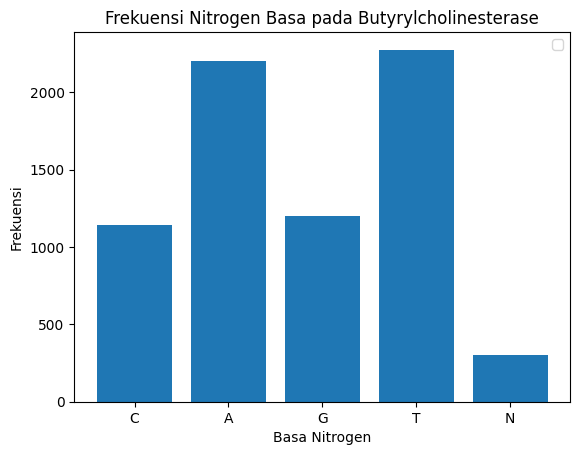

In [ ]:
#Diagram Batang Frekuensi Basa
dna_freqr = Counter(seqr)
print(dna_freqr)

plt.bar(dna_freqr.keys(), dna_freqr.values())
plt.legend()
plt.title('Frekuensi Nitrogen Basa pada Butyrylcholinesterase')
plt.xlabel("Basa Nitrogen")
plt.ylabel("Frekuensi")

Menghitung GC dan AT Content

In [ ]:
from Bio.SeqUtils import GC

def gc_content(seq):
  result = float((seq.count('G') + seq.count('C')) / len(seq)) * 100
  return result
print(f'Persentase GC adalah {gc_content(seqr)} %')

Persentase GC adalah 32.89824561403509 %


In [ ]:
def at_content(seq):
  result = float((seq.count('A') + seq.count('T')) / len(seq)) * 100
  return result
print(f'Persentase AT adalah {at_content(seqr)} %')

Persentase AT adalah 62.891228070175444 %


Menghitung Melting Point

In [ ]:
from Bio.SeqUtils import MeltingTemp as mt

In [ ]:
from Bio.SeqUtils import MeltingTemp as mt

#Wallace Method
print(f'Melting point with Wallace Method is {mt.Tm_Wallace(seqr, strict=False)}')
#GC Content Method
print(f'Melting point with Wallace Method is {mt.Tm_GC(seqr, strict=False)}')
#Using Nearest Neighbor Method
print(f'Melting point with Nearest Neighbor Method is {mt.Tm_NN(seqr, strict=False)}')

Melting point with Wallace Method is 19238.0
Melting point with Wallace Method is 74.17013014215334
Melting point with Nearest Neighbor Method is 76.08133736947065


Menghitung Molecular Weight

In [ ]:
def calculate_average_molecular_weight(sequence):
    valid_bases = ['A', 'T', 'C', 'G']
    total_weight = 0.0
    valid_count = 0

    for base in sequence:
        if base in valid_bases:
            total_weight += molecular_weight(base)
            valid_count += 1

    if valid_count > 0:
        average_weight = total_weight / valid_count
        return average_weight
    else:
        return None

average_mw = calculate_average_molecular_weight(seqr)

if average_mw:
    print(f"Average Molecular Weight: {average_mw:.2f} g/mol")
else:
    print("Unable to calculate average molecular weight.")

Average Molecular Weight: 327.01 g/mol


GC AT Skewness

In [ ]:
#GC dan AT Skewness
from Bio.SeqUtils import GC_skew

#Window 150
window = 150
gc_skew = []
at_skew = []

for i in range (0, len(seqr), window):
  subseq = seqr[i:i+window]
  gc_count = subseq.count('G') - subseq.count('C')
  at_count = subseq.count('A') - subseq.count('T')
  gc_skew.append(gc_count / (gc_count + window))
  at_skew.append(at_count / (at_count + window))

In [ ]:
print('Nilai Skewneess GC : %s' %(gc_skew))

Nilai Skewneess GC : [-0.1111111111111111, 0.23076923076923078, 0.0, -0.1111111111111111, 0.23076923076923078, 0.0, 0.23076923076923078, -0.1111111111111111, 0.09090909090909091, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.0, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.09090909090909091, 0.23076923076923078, 0.09090909090909091, 0.0, 0.09090909090909091, 0.16666666666666666, 0.0, 0.0, 0.09090909090909091, 0.09090909090909091, -0.25, 0.09090909090909091, 0.0, 0.16666666666666666, 0.09090909090909091, 0.16666666666666666, 0.09090909090909091, -0.1111111111111111, 0.23076923076923078, 0.23076923076923078, 0.0, 0.0, -0.42857142857142855, -0.1111111111111111, -0.25, 0.0, 0.16666666666666666, 0.09090909090909091, 0.0, -0.1111111111111111, 0.2857142857142857, 0.3333333333333333, 0.16666666666666666, 0.09090909090909091, -0.1111111111111111, 0.16666666666666666, -0.25, -0.1111111111111111, 0.0, -0.1111111111111111, 0.0, -0.42857142857142855, -0.1111111

In [ ]:
print('Nilai Skewneess AT : %s' %(at_skew))

Nilai Skewneess AT : [-0.1111111111111111, -0.1111111111111111, 0.2857142857142857, 0.23076923076923078, 0.3333333333333333, 0.16666666666666666, -0.1111111111111111, 0.3333333333333333, 0.09090909090909091, 0.0, 0.16666666666666666, 0.0, 0.375, 0.16666666666666666, 0.2857142857142857, -0.6666666666666666, 0.3333333333333333, 0.23076923076923078, 0.23076923076923078, -0.25, 0.09090909090909091, -0.6666666666666666, -0.25, 0.16666666666666666, 0.3333333333333333, -0.42857142857142855, 0.2857142857142857, -2.3333333333333335, -0.6666666666666666, 0.0, 0.3333333333333333, -0.25, 0.09090909090909091, -0.42857142857142855, 0.09090909090909091, 0.23076923076923078, 0.16666666666666666, -0.25, 0.09090909090909091, 0.23076923076923078, -0.25, 0.0, -0.25, -0.1111111111111111, 0.16666666666666666, 0.3333333333333333, -0.25, 0.09090909090909091, 0.0, -0.42857142857142855, 0.09090909090909091, -0.25, 0.2857142857142857, -0.42857142857142855, 0.2857142857142857, -0.42857142857142855, 0.166666666666

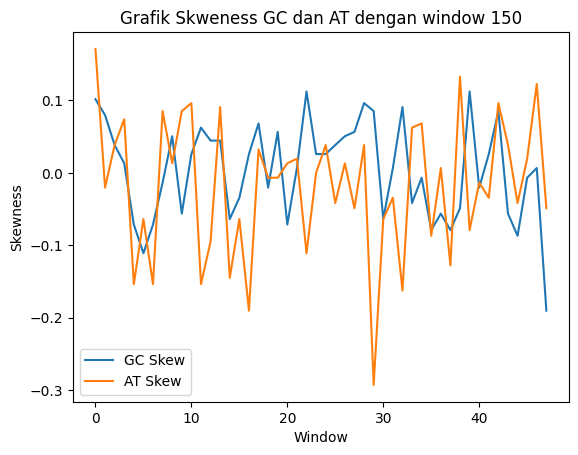

In [ ]:
#Grafik Skewness
import matplotlib.pyplot as plt

plt.plot(gc_skew, label = "GC Skew")
plt.plot(at_skew, label = "AT Skew")
plt.legend()
plt.xlabel("Window")
plt.ylabel("Skewness")
plt.title("Grafik Skweness GC dan AT dengan window 150")
plt.show()

In [ ]:
dna_record = SeqIO.read("bche.fasta", "fasta")
seqr = dna_record.seq

In [ ]:
protein_test = seqr.transcribe().translate()

In [ ]:
protein_test

Seq('QLLL*VEPQGRNSKTGRINALEVH*NNE*TNVA*L*NHARKRTTGTVTEGGSLK...NMY')

In [ ]:
stop_index = protein.find('*')
if stop_index != -1:
    protein_length = stop_index
else:
    protein_length = len(protein)

print("Panjang protein sebelum stop codon:", protein_length)

Panjang protein sebelum stop codon: 4


In [ ]:
protein_test_clean = protein_test.split("*")
protein_test_clean = [str(i) for i in protein_test_clean]
protein_test_clean

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({"amino_acids":protein_test_clean})

In [ ]:
df['count'] = df['amino_acids'].str.len()
df.head()

In [ ]:
df.nlargest(5, 'count')

,amino_acids,count
61,NIILTSLSEINMHSKVTIICIRFLFWFLLLCMLIGKSHTEDDIIIA...,517
58,SSFCGMRVISSCVCCVPLVLCGEQLLKLANGTEEVSXXXXXXXXXX...,81
87,FQFYYNVSILLFRNPNETQNNSTSWPVFKSTEQKYLTLNTESTRIM...,80
92,ISPXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXLYCVVRENGF...,62
12,NQLFYCLASCLKMKMKYVYICDIFYLAVSRCRKHVKCSAEFTNVTK...,60
